# Общая идея эксперимента
Идея нашего эксперимента состоит в следующем: мы будем многократно
случайным образом “бросать” точки в квадрат и моделировать вероятность того, что выбранная точка попадёт в окружность, вписанную в этот квадрат. Вероятность того, что случайная точка, выбранная внутри квадрата попадёт в окружность, пропорциональна отношению площади окружности
к площади квадрата. Так как площадь окружности пропорциональна числу π, измеряя долю точек, попавших в окружность, мы можем оценить значе-
ние π.

Процесс можно описать следующим образом:

1. Мы генерируем множество точек внутри квадрата с помощью равно-мерного распределения.
2. Для каждой точки проверяем, попала ли она внутрь окружности.
3. Подсчитываем долю точек, попавших в окружность, по сравнению с общим числом точек.

4. Используя это соотношение, приближённо вычисляем значение числа π.

(x - x0)² + (y - y0)² ≤ R², где (x, y) — координаты точки, (x0, y0) — центр окружности, а R — радиус. 

Xn+1 = aXn + b (mod M). - конгруэнтный метод

 1000


[0.75 0.75]
Приближённое значение π: 4.000000


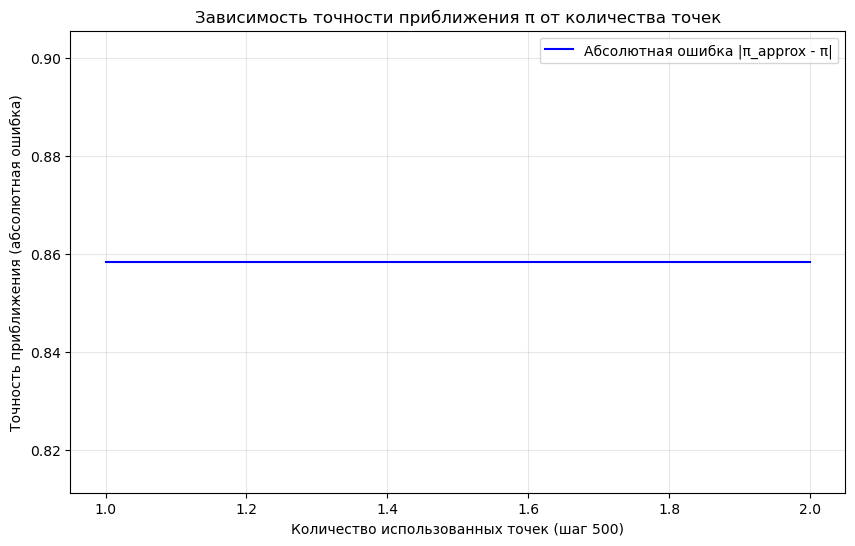

In [12]:
#Метод Монте-Карло для вычисления pi

import numpy as np
import math
import matplotlib.pyplot as plt


class random_gen:
    def __init__(self, start_value=0, a=6364136223846793005, b=1442695040888963407, m=2 ** 64):
        self.current = start_value
        self.a = a
        self.b = b
        self.m = m

    def next(self):
        self.current = (self.a * self.current + self.b) % self.m
        return self.current

    def uniform(self):
        return self.next() / self.m


# Ввод количества точек
amount_of_points = int(input())

# Инициализация генератора gen
gen = random_gen(11)

# Генерация случайных точек с использованием random_gen
points = np.array([[gen.uniform(), gen.uniform()] for _ in range(amount_of_points)])

print(points[0])

# Инициализация списков для накопления данных
inside_points = []
cumulative_inside = []  # Накопленное количество точек внутри круга
pi_approximations = []  # Приближённые значения π
errors = []            # Абсолютные ошибки
true_pi = math.pi      # Истинное значение π

# Последовательное добавление точек и пересчёт
cnt = 0
for i, point in enumerate(points):
    if ((point[0] - 0.5) ** 2 + (point[1] - 0.5) ** 2) <= 0.25:
        inside_points.append(point)
    cumulative_inside.append(len(inside_points))
    pi_approx = 4 * len(inside_points) / (i + 1)
    pi_approximations.append(pi_approx)
    cnt += 1
    if cnt == 500:
        errors.append(abs(pi_approx - true_pi))
        cnt = 0

# Вывод финального приближённого значения π
print(f"Приближённое значение π: {pi_approximations[-1]:.6f}")

# Построение графика зависимости точности (ошибки) от количества точек
plt.figure(figsize=(10, 6))
plt.plot(range(1, int(amount_of_points / 500) + 1), errors, label='Абсолютная ошибка |π_approx - π|', color='blue')
plt.xlabel('Количество использованных точек (шаг 500)')
plt.ylabel('Точность приближения (абсолютная ошибка)')
plt.title('Зависимость точности приближения π от количества точек')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()